In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split, RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
df = pd.read_csv("wage.data.txt", delim_whitespace=True)

In [3]:
## now that we have some variables, we make a linear model
## since it is all categorical variables, we will need to do some one-hot encoding (this will also make inferences easier)

In [4]:
# create one-hot for occupation
df["occ_1"] = df.occupation.apply(lambda x: 1 if x == 1 else 0)
df["occ_2"] = df.occupation.apply(lambda x: 1 if x == 2 else 0)
df["occ_3"] = df.occupation.apply(lambda x: 1 if x == 3 else 0)
df["occ_4"] = df.occupation.apply(lambda x: 1 if x == 4 else 0)
df["occ_5"] = df.occupation.apply(lambda x: 1 if x == 5 else 0)
df["occ_6"] = df.occupation.apply(lambda x: 1 if x == 6 else 0)

# create one-hot variables for sector
df["sec_0"] = df.sector.apply(lambda x: 1 if x == 0 else 0)
df["sec_1"] = df.sector.apply(lambda x: 1 if x == 1 else 0)
df["sec_2"] = df.sector.apply(lambda x: 1 if x == 2 else 0)

# create one-hot variables for race
df["race_1"] = df.race.apply(lambda x: 1 if x == 1 else 0)
df["race_2"] = df.race.apply(lambda x: 1 if x == 2 else 0)
df["race_3"] = df.race.apply(lambda x: 1 if x == 3 else 0)

In [28]:
## define training and testing splits
X = df.drop(["education", "experience", "wage", "age", "race", "occupation", "sector"], axis=1)
y = df.wage

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [29]:
## define and fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [30]:
# inspect coefficients
model.coef_

array([-0.62792962, -1.99509066,  1.9909261 ,  0.4124603 ,  3.59095802,
       -1.38075799, -0.59359119, -2.03827978,  2.45376812, -2.03209718,
       -0.53594378,  0.68015658, -0.1442128 , -0.01323475, -0.95155437,
        0.96478912])

In [31]:
# some slopes are quite small; use LASSO regression to really see what factors are truly important

In [32]:
## perform LASSO regression
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
model_lasso_cv = LassoCV(alphas=np.arange(0.001, 0.1, 0.001), max_iter=10000, cv=cv)
model_lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099]),
        cv=RepeatedKFold(n_repeats=5, n_splits=5, random_state=0),
        max_iter=10000)

In [33]:
# look at optimal alpha value
model_lasso_cv.alpha_

0.013000000000000001

In [34]:
# inspect coefficients of regularized model
model_lasso_cv.coef_

array([-0.59789306, -1.90004367,  1.91052252,  0.36658141,  4.30850425,
       -0.34176156,  0.12592925, -1.15652993,  3.23475562, -1.07344276,
       -0.35529559,  0.71995334, -0.        ,  0.        , -0.69216397,
        0.9531816 ])

In [35]:
# indeed, some factors are now 0; let's see how this model performs
preds = model_lasso_cv.predict(X_test)
print(np.sqrt(mean_squared_error(y_test, preds)))
print(r2_score(y_test, preds))

3.999113993805962
0.3215225218053662


In [36]:
# the model is abysmal, though we can still use the coefficients for interpretation

In [37]:
## try a classification model - decision tree as the important variables are all categorical

In [41]:
# create a binary wage variable: above and not above the median
df["above_median"] = df.wage.apply(lambda x: 1 if x >= df.wage.median() else 0)

In [42]:
# males seem to have higher median wage
# people not in south seem to have higher median wages
# union members seem to have higher median wages
# occupation and wage: 1=5, 3=6, 2=4 (highest median to lowest median)
# sectors 1 and 2 seem to have (equivalently) higher median wages compared to sector 0
# married people seem to have higher median wages than unmarried

In [55]:
## define train and test splits
X = df.loc[:, ["sex", "south", "union", "occupation", "sector", "marr"]]
y = df.above_median

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [56]:
## train a decision tree

<Axes: xlabel='above_median', ylabel='count'>

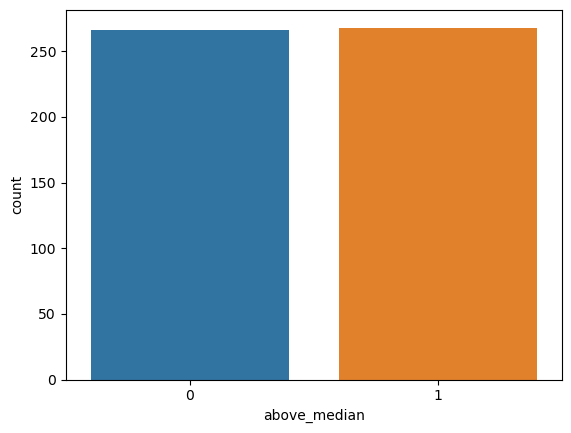

In [57]:
# inspect "imbalance" of response variable
sns.countplot(x=df.above_median)

In [58]:
# as there is practically no imbalance, it doesn't matter if we use gini or entropy

In [59]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [60]:
# see model accuracy
preds = model.predict(X_test)
confusion_matrix(y_test, preds)

array([[44,  9],
       [24, 30]], dtype=int64)

In [62]:
# precision = 44 / 53 = 0.830
# recall = 44/68 = 0.647
# f1-score = 0.727
# misclassification rate = 33/107 = 0.308

In [63]:
# while the misclassification rate is somewhat high, all measures of accuracy are quite good and the model is reasonable accurate
# let's inspect the structure of the tree

[Text(0.5556592039800995, 0.9545454545454546, 'x[2] <= 0.5\ngini = 0.5\nsamples = 427\nvalue = [213, 214]'),
 Text(0.27425373134328357, 0.8636363636363636, 'x[3] <= 1.5\ngini = 0.494\nsamples = 347\nvalue = [193, 154]'),
 Text(0.0845771144278607, 0.7727272727272727, 'x[4] <= 0.5\ngini = 0.414\nsamples = 41\nvalue = [12, 29]'),
 Text(0.07462686567164178, 0.6818181818181818, 'x[0] <= 0.5\ngini = 0.438\nsamples = 37\nvalue = [12, 25]'),
 Text(0.03980099502487562, 0.5909090909090909, 'x[5] <= 0.5\ngini = 0.386\nsamples = 23\nvalue = [6, 17]'),
 Text(0.01990049751243781, 0.5, 'x[1] <= 0.5\ngini = 0.444\nsamples = 9\nvalue = [3, 6]'),
 Text(0.009950248756218905, 0.4090909090909091, 'gini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(0.029850746268656716, 0.4090909090909091, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.05970149253731343, 0.5, 'x[1] <= 0.5\ngini = 0.337\nsamples = 14\nvalue = [3, 11]'),
 Text(0.04975124378109453, 0.4090909090909091, 'gini = 0.346\nsamples = 9\nvalue = [

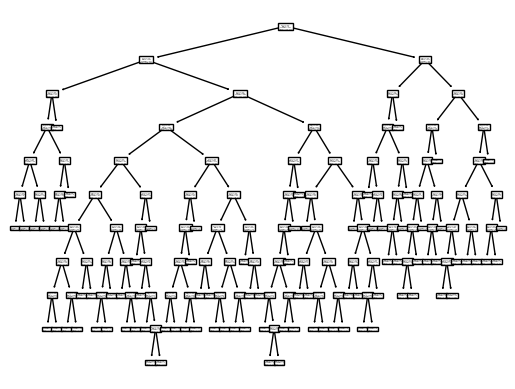

In [67]:
plot_tree(model)